In [1]:

import pandas as pd
import matplotlib.pylab as plt
import warnings
from spacepy import pycdf
from spacepy.time import Ticktock
import os
import numpy as np
import pandas as pd
from spacepy import pycdf
from spacepy.time import Ticktock
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [2]:


# def process_cdf_file(file_path):
#     with pycdf.CDF(file_path) as cdf:
#         # 读取时间变量，并将其转换为 datetime 对象
#         epoch = cdf['Epoch'][...]
#         tt = Ticktock(epoch, 'CDFepoch')
#         datetime_array = np.array(tt.UTC)

#         # 读取能量标签
#         FEDU_ENERGY_LABL = cdf['FEDU_ENERGY_LABL'][...]  # 形状：[能量]
#         FEDU_ENERGY_LABL = np.array(FEDU_ENERGY_LABL).astype(str)  # 转换为字符串数组
#         FEDU_ENERGY_LABL = FEDU_ENERGY_LABL.squeeze()
#         # 去除前后空格并转换为大写
#         FEDU_ENERGY_LABL_clean = np.char.strip(FEDU_ENERGY_LABL)
#         FEDU_ENERGY_LABL_upper = np.char.upper(FEDU_ENERGY_LABL_clean)

#         # 查找包含 'LOW/2' 的能量标签（不区分大小写）
#         target_label = 'HIGH/1'############################################################################################################################################################################
#         contains_target = np.char.find(FEDU_ENERGY_LABL_upper, target_label.upper()) >= 0
#         energy_indices = np.where(contains_target)[0]
#         print(energy_indices)

#         if len(energy_indices) == 0:
#             print(f"在文件 {file_path} 中未找到包含 '{target_label}' 的能量标签")
#             return pd.DataFrame()  # 返回空的 DataFrame
#         else:
#             energy_index = energy_indices[0]  # 获取第一个匹配的索引

#         # 读取通量数据和相关变量
#         fedu_corr = cdf['FEDU_CORR'][...]  # 形状：[时间，俯仰角，能量]
#         fedu_corr_error = cdf['FEDU_CORR_ERROR'][...]
#         fedu_alpha = cdf['FEDU_Alpha'][...]  # 俯仰角数组

#         # 读取其他所需的变量
#         B_Calc = cdf['B_Calc'][...]
#         B_Eq = cdf['B_Eq'][...]
#         I = cdf['I'][...]
#         L = cdf['L'][...]
#         L_star = cdf['L_star'][...]
#         Position = cdf['Position'][...]
#         MLT = cdf['MLT'][...]
#         MLAT = cdf['MLAT'][...]
#         # 读取 LstarVsAlpha 和 LstarVsAlpha_Alpha
#         LstarVsAlpha = cdf['LstarVsAlpha'][...]          # 形状：[时间，18]
#         # LstarVsAlpha_Alpha = cdf['LstarVsAlpha_Alpha'][...]  # 形状：[18]

#     # 获取数据的维度
#     num_times = len(datetime_array)
#     num_pitches = len(fedu_alpha)
#     # 计算总记录数
#     total_records = num_times * num_pitches
#     # 创建索引网格，用于展开数据
#     time_indices = np.arange(num_times)
#     pitch_indices = np.arange(num_pitches)
#     time_grid, pitch_grid = np.meshgrid(
#         time_indices, pitch_indices, indexing='ij')

#     # 将网格展开为一维数组
#     time_flat = time_grid.flatten()
#     pitch_flat = pitch_grid.flatten()

#     # 提取并展开数据，以匹配总记录数
#     time_array = datetime_array[time_flat]
#     flux_array = fedu_corr[time_flat, pitch_flat, energy_index]
#     flux_error_array = fedu_corr_error[time_flat, pitch_flat, energy_index]
#     pitch_angle_array = fedu_alpha[pitch_flat]
#     B_Calc_array = B_Calc[time_flat]
#     B_Eq_array = B_Eq[time_flat]
#     I_array = I[time_flat]
#     L_array = L[time_flat]
#     L_star_array = L_star[time_flat]
#     MLT_array = MLT[time_flat]
#     MLAT_array = MLAT[time_flat]
#     Position_array = Position[time_flat, :]
#     X_array = Position_array[:, 0]
#     Y_array = Position_array[:, 1]
#     Z_array = Position_array[:, 2]
#     LstarVsAlpha90 = LstarVsAlpha[:,0]
#     LstarVsAlpha90=np.repeat(LstarVsAlpha90,11)
#     LstarVsAlpha85 = LstarVsAlpha[:,1]
#     LstarVsAlpha85=np.repeat(LstarVsAlpha85,11)
#     LstarVsAlpha80 = LstarVsAlpha[:,2]
#     LstarVsAlpha80=np.repeat(LstarVsAlpha80,11)
#     LstarVsAlpha75 = LstarVsAlpha[:,3]
#     LstarVsAlpha75=np.repeat(LstarVsAlpha75,11)
#     LstarVsAlpha70 = LstarVsAlpha[:,4]
#     LstarVsAlpha70=np.repeat(LstarVsAlpha70,11)
#     LstarVsAlpha65 = LstarVsAlpha[:,5]
#     LstarVsAlpha65=np.repeat(LstarVsAlpha65,11)
#     LstarVsAlpha60 = LstarVsAlpha[:,6]
#     LstarVsAlpha60=np.repeat(LstarVsAlpha60,11)
#     LstarVsAlpha55 = LstarVsAlpha[:,7]
#     LstarVsAlpha55=np.repeat(LstarVsAlpha55,11)
#     LstarVsAlpha50 = LstarVsAlpha[:,8]
#     LstarVsAlpha50=np.repeat(LstarVsAlpha50,11)
#     LstarVsAlpha45 = LstarVsAlpha[:,9]
#     LstarVsAlpha45=np.repeat(LstarVsAlpha45,11)
#     LstarVsAlpha40 = LstarVsAlpha[:,10]
#     LstarVsAlpha40=np.repeat(LstarVsAlpha40,11)
#     LstarVsAlpha35 = LstarVsAlpha[:,11]
#     LstarVsAlpha35=np.repeat(LstarVsAlpha35,11)
#     LstarVsAlpha30 = LstarVsAlpha[:,12]
#     LstarVsAlpha30=np.repeat(LstarVsAlpha30,11)
#     LstarVsAlpha25 = LstarVsAlpha[:,13]
#     LstarVsAlpha25=np.repeat(LstarVsAlpha25,11)
#     LstarVsAlpha20 = LstarVsAlpha[:,14]
#     LstarVsAlpha20=np.repeat(LstarVsAlpha20,11)
#     LstarVsAlpha15 = LstarVsAlpha[:,15]
#     LstarVsAlpha15=np.repeat(LstarVsAlpha15,11)
#     LstarVsAlpha10 = LstarVsAlpha[:,16]
#     LstarVsAlpha10=np.repeat(LstarVsAlpha10,11)
#     LstarVsAlpha5 = LstarVsAlpha[:,17]
#     LstarVsAlpha5=np.repeat(LstarVsAlpha5,11)

#     data = {
#         'Time': time_array,
#         'Flux': flux_array,
#         'Flux_Error': flux_error_array,
#         'PitchAngle': pitch_angle_array,
#         'B_Calc': B_Calc_array,
#         'B_Eq': B_Eq_array,
#         'I': I_array,
#         'L': L_array,
#         'L_star': L_star_array,
#         # 'L_star_PitchAngle': L_star_PitchAngle_array,
#         'MLT': MLT_array,
#         'MLAT': MLAT_array,
#         'X': X_array,
#         'Y': Y_array,
#         'Z': Z_array,
#         'LstarVsAlpha90': LstarVsAlpha90,
#         'LstarVsAlpha85': LstarVsAlpha85,
#         'LstarVsAlpha80': LstarVsAlpha80,
#         'LstarVsAlpha75': LstarVsAlpha75,
#         'LstarVsAlpha70': LstarVsAlpha70,
#         'LstarVsAlpha65': LstarVsAlpha65,
#         'LstarVsAlpha60': LstarVsAlpha60,
#         'LstarVsAlpha55': LstarVsAlpha55,
#         'LstarVsAlpha50': LstarVsAlpha50,
#         'LstarVsAlpha45': LstarVsAlpha45,
#         'LstarVsAlpha40': LstarVsAlpha40,
#         'LstarVsAlpha35': LstarVsAlpha35,
#         'LstarVsAlpha30': LstarVsAlpha30,
#         'LstarVsAlpha25': LstarVsAlpha25,
#         'LstarVsAlpha20': LstarVsAlpha20,
#         'LstarVsAlpha15': LstarVsAlpha15,
#         'LstarVsAlpha10': LstarVsAlpha10,
#         'LstarVsAlpha5': LstarVsAlpha5,
#     }

#     # 创建 DataFrame
#     df = pd.DataFrame(data)

#     # 过滤无效数据
#     df = df[df['Flux_Error'] >= 0]
#     # df = df[df['Flux_Error'] < 20]
#     df = df[df['B_Calc'] >= 0]
#     df = df[df['L_star'] >= 0]
#     df = df[df['Flux'] >=0]
#     df = df.sample(frac=0.005, replace=False, random_state=1565)
#     return df



In [3]:
file_path='../RBSP/A_L4/rbspa_rel04_ect-mageis-l3_20130529_v8.1.0.cdf'
with pycdf.CDF(file_path) as cdf:
    # 读取时间变量，并将其转换为 datetime 对象
    epoch = cdf['Epoch'][...]
    tt = Ticktock(epoch, 'CDFepoch')
    datetime_array = np.array(tt.UTC)

    # 读取能量标签
    FEDU_ENERGY_LABL = cdf['FEDU_ENERGY_LABL'][...]  # 形状：[能量]
print(FEDU_ENERGY_LABL)

[['33 keV (LOW/2)                ' '54 keV (LOW/3)                '
  '80 keV (LOW/4)                ' '108 keV (LOW/5)               '
  '143 keV (LOW/6)               ' '184 keV (LOW/7)               '
  '226 keV (LOW/8)               ' '235 keV (M75/2)               '
  '346 keV (M75/3)               ' '470 keV (M75/4)               '
  '597 keV (M75/5)               ' '749 keV (M75/6)               '
  '909 keV (M75/7)               ' '1064 keV (HIGH/0)             '
  '1079 keV (M75/8)              ' '1650 keV (HIGH/1)             '
  '1768 keV (HIGH/2)             ' '2333 keV (HIGH/3)             '
  '2680 keV (HIGH/4)             ' '3618 keV (HIGH/5)             '
  '4062 keV (HIGH/6)             ' 'fill keV                      '
  'fill keV                      ' 'fill keV                      '
  'fill keV                      ']]


In [4]:


# def process_cdf_file(file_path):
#     with pycdf.CDF(file_path) as cdf:
#         # 读取时间变量，并将其转换为 datetime 对象
#         epoch = cdf['Epoch'][...]
#         tt = Ticktock(epoch, 'CDFepoch')
#         datetime_array = np.array(tt.UTC)

#         # 读取能量标签
#         FEDU_ENERGY_LABL = cdf['FEDU_ENERGY_LABL'][...]  # 形状：[能量]
#         FEDU_ENERGY_LABL = np.array(FEDU_ENERGY_LABL).astype(str)  # 转换为字符串数组
#         FEDU_ENERGY_LABL = FEDU_ENERGY_LABL.squeeze()
#         # 去除前后空格并转换为大写
#         FEDU_ENERGY_LABL_clean = np.char.strip(FEDU_ENERGY_LABL)
#         FEDU_ENERGY_LABL_upper = np.char.upper(FEDU_ENERGY_LABL_clean)

#         # 查找包含 'LOW/2' 的能量标签（不区分大小写）
#         target_label = 'M75/2'############################################################################################################################################################################
#         contains_target = np.char.find(FEDU_ENERGY_LABL_upper, target_label.upper()) >= 0
#         energy_indices = np.where(contains_target)[0]
#         print(energy_indices)

#         if len(energy_indices) == 0:
#             print(f"在文件 {file_path} 中未找到包含 '{target_label}' 的能量标签")
#             return pd.DataFrame()  # 返回空的 DataFrame
#         else:
#             energy_index = energy_indices[0]  # 获取第一个匹配的索引

#         # 读取通量数据和相关变量
#         fedu_corr = cdf['FEDU_CORR'][...]  # 形状：[时间，俯仰角，能量]
#         fedu_corr_error = cdf['FEDU_CORR_ERROR'][...]
#         fedu_alpha = cdf['FEDU_Alpha'][...]  # 俯仰角数组

#         # 读取其他所需的变量
#         B_Calc = cdf['B_Calc'][...]
#         B_Eq = cdf['B_Eq'][...]
#         I = cdf['I'][...]
#         L = cdf['L'][...]
#         L_star = cdf['L_star'][...]
#         Position = cdf['Position'][...]
#         MLT = cdf['MLT'][...]
#         MLAT = cdf['MLAT'][...]
#         # 读取 LstarVsAlpha 和 LstarVsAlpha_Alpha
#         LstarVsAlpha = cdf['LstarVsAlpha'][...]          # 形状：[时间，18]
#         # LstarVsAlpha_Alpha = cdf['LstarVsAlpha_Alpha'][...]  # 形状：[18]

#     # 获取数据的维度
#     num_times = len(datetime_array)
#     num_pitches = len(fedu_alpha)
#     # 计算总记录数
#     total_records = num_times * num_pitches
#     # 创建索引网格，用于展开数据
#     time_indices = np.arange(num_times)
#     pitch_indices = np.arange(num_pitches)
#     time_grid, pitch_grid = np.meshgrid(
#         time_indices, pitch_indices, indexing='ij')

#     # 将网格展开为一维数组
#     time_flat = time_grid.flatten()
#     pitch_flat = pitch_grid.flatten()

#     # 提取并展开数据，以匹配总记录数
#     time_array = datetime_array[time_flat]
#     flux_array = fedu_corr[time_flat, pitch_flat, energy_index]
#     flux_error_array = fedu_corr_error[time_flat, pitch_flat, energy_index]
#     pitch_angle_array = fedu_alpha[pitch_flat]
#     B_Calc_array = B_Calc[time_flat]
#     B_Eq_array = B_Eq[time_flat]
#     I_array = I[time_flat]
#     L_array = L[time_flat]
#     L_star_array = L_star[time_flat]
#     MLT_array = MLT[time_flat]
#     MLAT_array = MLAT[time_flat]
#     Position_array = Position[time_flat, :]
#     X_array = Position_array[:, 0]
#     Y_array = Position_array[:, 1]
#     Z_array = Position_array[:, 2]
#     LstarVsAlpha90 = LstarVsAlpha[:,0]
#     LstarVsAlpha90=np.repeat(LstarVsAlpha90,11)
#     LstarVsAlpha85 = LstarVsAlpha[:,1]
#     LstarVsAlpha85=np.repeat(LstarVsAlpha85,11)
#     LstarVsAlpha80 = LstarVsAlpha[:,2]
#     LstarVsAlpha80=np.repeat(LstarVsAlpha80,11)
#     LstarVsAlpha75 = LstarVsAlpha[:,3]
#     LstarVsAlpha75=np.repeat(LstarVsAlpha75,11)
#     LstarVsAlpha70 = LstarVsAlpha[:,4]
#     LstarVsAlpha70=np.repeat(LstarVsAlpha70,11)
#     LstarVsAlpha65 = LstarVsAlpha[:,5]
#     LstarVsAlpha65=np.repeat(LstarVsAlpha65,11)
#     LstarVsAlpha60 = LstarVsAlpha[:,6]
#     LstarVsAlpha60=np.repeat(LstarVsAlpha60,11)
#     LstarVsAlpha55 = LstarVsAlpha[:,7]
#     LstarVsAlpha55=np.repeat(LstarVsAlpha55,11)
#     LstarVsAlpha50 = LstarVsAlpha[:,8]
#     LstarVsAlpha50=np.repeat(LstarVsAlpha50,11)
#     LstarVsAlpha45 = LstarVsAlpha[:,9]
#     LstarVsAlpha45=np.repeat(LstarVsAlpha45,11)
#     LstarVsAlpha40 = LstarVsAlpha[:,10]
#     LstarVsAlpha40=np.repeat(LstarVsAlpha40,11)
#     LstarVsAlpha35 = LstarVsAlpha[:,11]
#     LstarVsAlpha35=np.repeat(LstarVsAlpha35,11)
#     LstarVsAlpha30 = LstarVsAlpha[:,12]
#     LstarVsAlpha30=np.repeat(LstarVsAlpha30,11)
#     LstarVsAlpha25 = LstarVsAlpha[:,13]
#     LstarVsAlpha25=np.repeat(LstarVsAlpha25,11)
#     LstarVsAlpha20 = LstarVsAlpha[:,14]
#     LstarVsAlpha20=np.repeat(LstarVsAlpha20,11)
#     LstarVsAlpha15 = LstarVsAlpha[:,15]
#     LstarVsAlpha15=np.repeat(LstarVsAlpha15,11)
#     LstarVsAlpha10 = LstarVsAlpha[:,16]
#     LstarVsAlpha10=np.repeat(LstarVsAlpha10,11)
#     LstarVsAlpha5 = LstarVsAlpha[:,17]
#     LstarVsAlpha5=np.repeat(LstarVsAlpha5,11)

#     data = {
#         'Time': time_array,
#         'Flux': flux_array,
#         'Flux_Error': flux_error_array,
#         'PitchAngle': pitch_angle_array,
#         'B_Calc': B_Calc_array,
#         'B_Eq': B_Eq_array,
#         'I': I_array,
#         'L': L_array,
#         'L_star': L_star_array,
#         # 'L_star_PitchAngle': L_star_PitchAngle_array,
#         'MLT': MLT_array,
#         'MLAT': MLAT_array,
#         'X': X_array,
#         'Y': Y_array,
#         'Z': Z_array,
#         'LstarVsAlpha90': LstarVsAlpha90,
#         'LstarVsAlpha85': LstarVsAlpha85,
#         'LstarVsAlpha80': LstarVsAlpha80,
#         'LstarVsAlpha75': LstarVsAlpha75,
#         'LstarVsAlpha70': LstarVsAlpha70,
#         'LstarVsAlpha65': LstarVsAlpha65,
#         'LstarVsAlpha60': LstarVsAlpha60,
#         'LstarVsAlpha55': LstarVsAlpha55,
#         'LstarVsAlpha50': LstarVsAlpha50,
#         'LstarVsAlpha45': LstarVsAlpha45,
#         'LstarVsAlpha40': LstarVsAlpha40,
#         'LstarVsAlpha35': LstarVsAlpha35,
#         'LstarVsAlpha30': LstarVsAlpha30,
#         'LstarVsAlpha25': LstarVsAlpha25,
#         'LstarVsAlpha20': LstarVsAlpha20,
#         'LstarVsAlpha15': LstarVsAlpha15,
#         'LstarVsAlpha10': LstarVsAlpha10,
#         'LstarVsAlpha5': LstarVsAlpha5,
#     }

#     # 创建 DataFrame
#     df = pd.DataFrame(data)
#     df['Time'] = pd.to_datetime(df['Time'])  # 确保是 datetime 类型
#     df.set_index('Time', inplace=True)

#     df = df[df['Flux_Error'] >= 0]
#     # df = df[df['Flux_Error'] < 20]
#     df = df[df['B_Calc'] >= 0]
#     df = df[df['L_star'] >= 0]
#     df = df[df['Flux'] >=0]
#     #if df为空，则返回空的DataFrame
#     if df.empty:
#         print(f"在文件 {file_path} 中没有有效数据")
#         return pd.DataFrame()  # 返回空的 DataFrame
#     else:
#         df_avg  = df.groupby('PitchAngle', as_index=False).resample('1min').mean()
                     
#         df_avg = df_avg.sample(frac=0.03, replace=False, random_state=1565)
#         #将['Time']恢复为列
#         df_avg.reset_index(drop=False, inplace=True)
        
#         return df_avg



In [5]:
folder_paths = ['../RBSP/A_L4', '../RBSP/B_L4']  # 请替换为您的文件夹路径

# 存储所有 CDF 文件的路径
cdf_files = []

# 遍历所有文件夹，获取其中的 CDF 文件
for folder_path in folder_paths:
    cdf_files.extend([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.cdf')])

print(len(cdf_files))

# cdf_files=cdf_files[999:1000]
# 存储每个文件的 DataFrame
df_list = []

for file_path in cdf_files:
    print(f"Processing file: {file_path}")
    df = process_cdf_file(file_path)
    if not df.empty:
        df_list.append(df)
    else:
        print(f"跳过文件 {file_path}，因为不包含目标能量标签。")

if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    # 可选：查看拼接后的 DataFrame 的前几行
    print(combined_df.head())
else:
    print("未找到包含目标能量标签的数据。")

4566
Processing file: ../RBSP/A_L4\rbspa_rel04_ect-mageis-l3_20120907_v8.1.0.cdf


NameError: name 'process_cdf_file' is not defined

In [ ]:
print(combined_df)

                           Time       Flux  Flux_Error  PitchAngle  \
0       2012-10-05 13:39:34.616  81.327838   23.000000  122.727273   
1       2012-10-05 10:36:37.026  18.312992   39.809662   24.545455   
2       2012-10-05 13:42:18.786  91.865089   22.000000  106.363636   
3       2012-10-05 22:22:50.217  29.748665   28.646668  106.363636   
4       2012-10-05 07:56:55.063   0.000000  112.613388   57.272727   
...                         ...        ...         ...         ...   
1467336 2018-12-31 17:22:05.634   0.000000   94.330383   57.272727   
1467337 2018-12-31 04:43:18.802  34.506115   10.595633  139.090909   
1467338 2018-12-31 08:57:29.687  23.134647   17.098991   57.272727   
1467339 2018-12-31 14:17:04.570   0.000000   99.691177   90.000000   
1467340 2018-12-31 19:03:00.336   7.359201   44.001568    8.181818   

              B_Calc         B_Eq         I         L    L_star        MLT  \
0         205.767862   203.646131  0.036321  5.276615  4.745125   8.491751   
1  

In [ ]:
# 提取列名中的角度信息
angles = [int(col.split('LstarVsAlpha')[-1]) for col in combined_df.columns if 'LstarVsAlpha' in col]
columns = [col for col in combined_df.columns if 'LstarVsAlpha' in col]

# 将角度和列名对应关系构建成字典
angle_column_map = dict(zip(angles, columns))

# 对角度和列名按角度递增顺序排序
sorted_pairs = sorted(zip(angles, columns))
sorted_angles, sorted_columns = zip(*sorted_pairs)

# 将 sorted_angles 和 sorted_columns 转换为列表
sorted_angles = list(sorted_angles)
sorted_columns = list(sorted_columns)

# 将Lstar值中小于0的替换为NaN
combined_df[sorted_columns] = combined_df[sorted_columns].applymap(lambda x: np.nan if x < 0 else x)

# 定义插值函数
def interpolate_row(row):
    # 根据PitchAngle进行插值
    target_angle = row['PitchAngle']
    if target_angle > 90:
        target_angle = 180 - target_angle

    if target_angle < 5:
        target_angle = 5

    x = np.array(sorted_angles)
    y = np.array([row[col] for col in sorted_columns])

    # 筛选有效的（非NaN）数据点
    valid_indices = ~np.isnan(y)
    if np.sum(valid_indices) < 2:
        # 若有效数据点少于2个，无法进行插值，返回NaN
        return np.nan
    else:
        # 进行线性插值
        return np.interp(target_angle, x[valid_indices], y[valid_indices])

# 生成新列，存储插值后的结果
combined_df['Interpolated_Lstar'] = combined_df.apply(interpolate_row, axis=1)

# 显示结果
print(combined_df.head())


C:\Users\root\AppData\Local\Temp\ipykernel_29424\1871395007.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df[sorted_columns] = combined_df[sorted_columns].applymap(lambda x: np.nan if x < 0 else x)


                     Time       Flux  Flux_Error  PitchAngle       B_Calc  \
0 2012-10-05 13:39:34.616  81.327838   23.000000  122.727273   205.767862   
1 2012-10-05 10:36:37.026  18.312992   39.809662   24.545455   165.228320   
2 2012-10-05 13:42:18.786  91.865089   22.000000  106.363636   210.082727   
3 2012-10-05 22:22:50.217  29.748665   28.646668  106.363636   229.876295   
4 2012-10-05 07:56:55.063   0.000000  112.613388   57.272727  3808.982576   

          B_Eq         I         L    L_star       MLT  ...  LstarVsAlpha45  \
0   203.646131  0.036321  5.276615  4.745125  8.491751  ...        4.831637   
1   149.480082  0.319309  5.802351  5.150080  6.486058  ...        5.148479   
2   208.025615  0.034327  5.239452  4.718235  8.528761  ...        4.803840   
3   154.386244  1.507143  5.730108  5.197860  7.845123  ...        5.253673   
4  2468.604577  0.675011  2.283528  2.266346  2.129519  ...        2.260542   

   LstarVsAlpha40  LstarVsAlpha35  LstarVsAlpha30  LstarVsAlph

In [ ]:
combined_df = combined_df.drop(columns=columns)

In [ ]:
#查看Interpolated_Lstar中有多少nan
print(combined_df['Interpolated_Lstar'].isna().sum())

1149


In [ ]:
#如果Interpolated_Lstar中有nan，用L_star列的值代替
combined_df['Interpolated_Lstar'] = combined_df['Interpolated_Lstar'].fillna(combined_df['L_star'])

In [ ]:
# print(combined_df['B_Calc'].min())

In [ ]:
import numpy as np  
print(np.cos(np.pi))

-1.0


In [ ]:
# E=1.612+0.511
# c=3*10**8
# m_0=0.51099895/(c**2)
# p=np.sqrt(E**2-0.511**2)/c
# # u=p**2/(2*m_0*207*10**-5)
# combined_df['u']=(p*np.sin(combined_df['PitchAngle']/180*np.pi))**2/(2*m_0*combined_df['B_Calc']*10**-5)
# print(combined_df['u'])

In [ ]:
# print(combined_df['I'].min())

In [ ]:
# combined_df['PSD'] = combined_df['Flux']*1e3 / (2.9979e10*(p**2)*(c**2))
# print(combined_df['PSD'])

In [ ]:
# #画combined_df['u']的分布
# plt.hist(combined_df['u'], bins=100, alpha=0.75)
# plt.xlabel('u')
# plt.ylabel('Frequency')
# plt.title('Distribution of u')
# plt.show()


In [ ]:
# #画combined_df['u']的分布
# plt.hist(combined_df['I'], bins=100, alpha=0.75)
# plt.xlabel('u')
# plt.ylabel('Frequency')
# plt.title('Distribution of u')
# plt.show()


In [ ]:
# #画combined_df['u']的分布
# plt.hist(combined_df['Interpolated_Lstar'], bins=100, alpha=0.75)
# plt.xlabel('u')
# plt.ylabel('Frequency')
# plt.title('Distribution of u')
# plt.show()


In [ ]:
combined_df = combined_df.sort_values('Time')

In [ ]:
combined_df = combined_df.reset_index(drop=True)

In [ ]:
# #查看combined_df['Flux']有多少个值为0
# print(combined_df[combined_df['Flux']==0].shape[0])

(array([4.61127e+05, 0.00000e+00, 6.00000e+00, 6.00000e+00, 2.80000e+01,
        1.05000e+02, 3.90000e+02, 5.29000e+02, 2.40200e+03, 1.84900e+03,
        5.28000e+03, 5.96400e+03, 8.52800e+03, 8.44200e+03, 9.51500e+03,
        9.16000e+03, 1.30490e+04, 8.87200e+03, 8.47400e+03, 1.36910e+04,
        1.07110e+04, 1.16820e+04, 1.09650e+04, 1.30450e+04, 1.20100e+04,
        1.46560e+04, 1.26970e+04, 1.43200e+04, 1.43640e+04, 1.60290e+04,
        1.55060e+04, 1.64040e+04, 1.68480e+04, 1.77370e+04, 1.79470e+04,
        1.84400e+04, 1.85630e+04, 1.94900e+04, 1.97750e+04, 1.98630e+04,
        2.02440e+04, 2.08650e+04, 2.12860e+04, 2.18360e+04, 2.22940e+04,
        2.24260e+04, 2.25590e+04, 2.28090e+04, 2.27180e+04, 2.26940e+04,
        2.25710e+04, 2.17250e+04, 2.17240e+04, 2.18410e+04, 2.12570e+04,
        2.06770e+04, 2.00590e+04, 1.95870e+04, 1.88300e+04, 1.81940e+04,
        1.71310e+04, 1.58050e+04, 1.52180e+04, 1.41500e+04, 1.30690e+04,
        1.21170e+04, 1.08560e+04, 1.00130e+04, 8.94

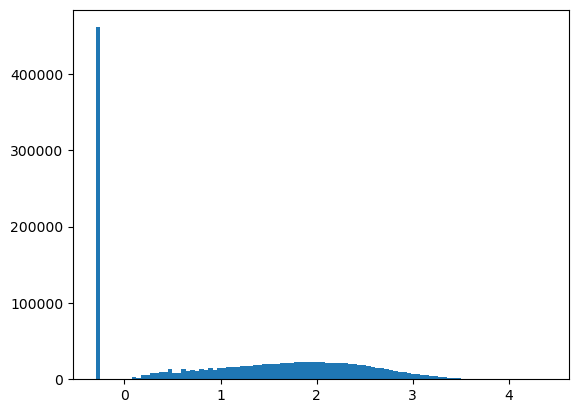

In [ ]:
#查看df['Flux']的分布   
plt.hist(np.log10(combined_df['Flux']+0.5), bins=100)

In [ ]:
# #画出df['I']的数据分布
# plt.figure()
# plt.hist(combined_df['L_star'], bins=100)
# plt.xlabel('I')
# plt.ylabel('Frequency')
# plt.title('Distribution of I')
# plt.show()


In [ ]:
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
TQ=pd.read_csv('../空间天气参数/TQ.txt',sep='\s+',header=None)
TQ.columns=['year','day','hour','BXGSM','BYGSM','BZGSM','TEMP','DEN','PDYN','Kp','Dst','F107','AE','AL','AU']
TQ['datetime'] = pd.to_datetime(TQ['year'].astype(str) + TQ['day'].astype(str).str.zfill(3) + TQ['hour'].astype(str).str.zfill(2), format='%Y%j%H')
TQ=TQ.drop(['year','day','hour'],axis=1)
TQ = TQ.sort_values(by='datetime')
TQ.set_index('datetime', inplace=True)

In [ ]:
#删除TQ中的BXGSM列
TQ=TQ.drop(['BXGSM'],axis=1)
TQ=TQ.drop(['BYGSM'],axis=1)
TQ=TQ.drop(['DEN'],axis=1)

print(TQ)

                     BZGSM     TEMP  PDYN  Kp  Dst  F107    AE     AL     AU
datetime                                                                    
2010-01-01 00:00:00    1.6  36035.0  0.51   0    5  72.7     4     -2      2
2010-01-01 01:00:00    1.6  30846.0  0.52   0    4  72.7     4     -2      1
2010-01-01 02:00:00    1.2  27445.0  0.52   0    4  72.7     4     -2      2
2010-01-01 03:00:00    1.0  25799.0  0.60   0    2  72.7     3     -2      2
2010-01-01 04:00:00    0.3  25220.0  0.52   0    0  72.7     3     -1      2
...                    ...      ...   ...  ..  ...   ...   ...    ...    ...
2020-01-01 19:00:00   -0.3  18136.0  2.30  10    2  69.4  9999  99999  99999
2020-01-01 20:00:00   -0.2  16553.0  2.31  10    5  69.4  9999  99999  99999
2020-01-01 21:00:00    0.4  17917.0  2.37   7    7  69.4  9999  99999  99999
2020-01-01 22:00:00    1.2  18613.0  2.14   7    6  69.4  9999  99999  99999
2020-01-01 23:00:00    1.1  19557.0  1.89   7    5  69.4  9999  99999  99999

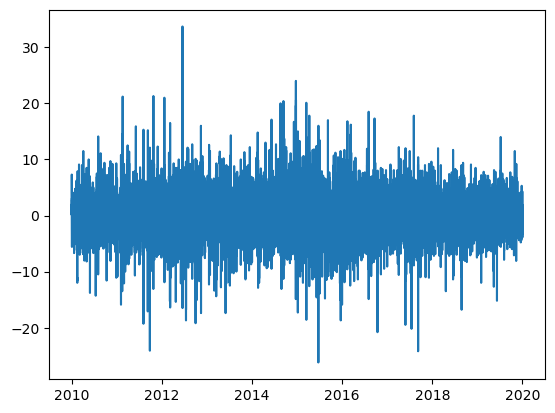

In [ ]:
z_scores = np.abs(stats.zscore(TQ['BZGSM']))
threshold = 3  # 设置Z-score阈值
TQ['BZGSM_IS1'] = np.where(z_scores >= threshold, 0, 1)
TQ['BZGSM_no_outliers'] = TQ['BZGSM'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# 在原位置插值
TQ['BZGSM'] = TQ['BZGSM_no_outliers'].interpolate(method='time')
# 删除临时列
TQ = TQ.drop(columns=['BZGSM_no_outliers'])
plt.plot(TQ.index, TQ['BZGSM'])

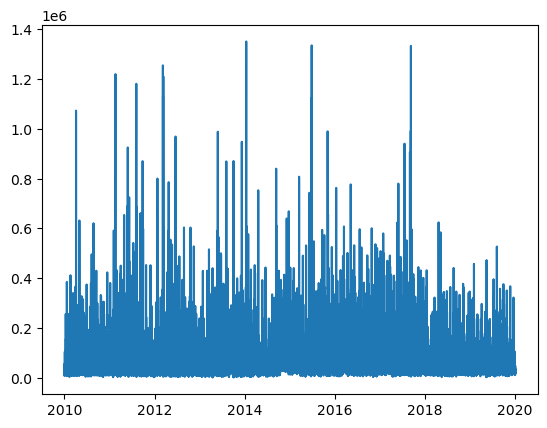

In [ ]:
z_scores = np.abs(stats.zscore(TQ['TEMP']))
threshold = 3  # 设置Z-score阈值
TQ['TEMP_IS1'] = np.where(z_scores >= threshold, 0, 1)
TQ['TEMP_no_outliers'] = TQ['TEMP'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# 在原位置插值
TQ['TEMP'] = TQ['TEMP_no_outliers'].interpolate(method='time')
# 删除临时列
TQ = TQ.drop(columns=['TEMP_no_outliers'])
plt.plot(TQ.index, TQ['TEMP'])

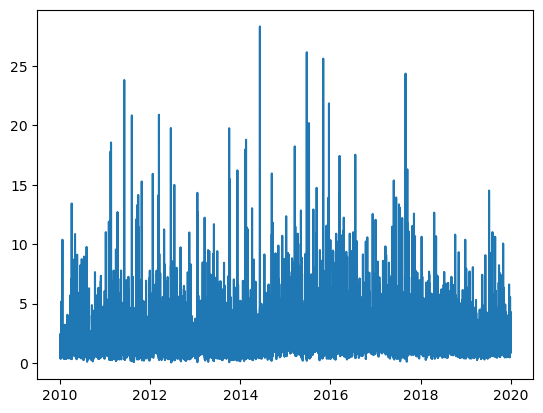

In [ ]:
z_scores = np.abs(stats.zscore(TQ['PDYN']))
threshold = 3  # 设置Z-score阈值
TQ['PDYN_IS1'] = np.where(z_scores >= threshold, 0, 1)
TQ['PDYN_no_outliers'] = TQ['PDYN'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# 在原位置插值
TQ['PDYN'] = TQ['PDYN_no_outliers'].interpolate(method='time')
# 删除临时列
TQ = TQ.drop(columns=['PDYN_no_outliers'])
plt.plot(TQ.index, TQ['PDYN'])

In [ ]:
# plt.plot(TQ.index, TQ['Kp'])

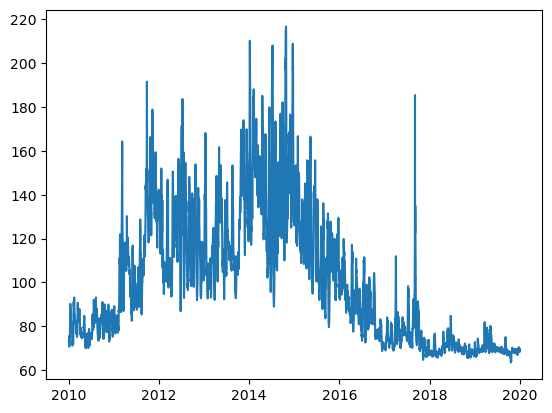

In [ ]:
z_scores = np.abs(stats.zscore(TQ['F107']))
threshold = 3  # 设置Z-score阈值
TQ['F107_IS1'] = np.where(z_scores >= threshold, 0, 1)
TQ['F107_no_outliers'] = TQ['F107'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# 在原位置插值
TQ['F107'] = TQ['F107_no_outliers'].interpolate(method='time')
# 删除临时列
TQ = TQ.drop(columns=['F107_no_outliers'])
plt.plot(TQ.index, TQ['F107'])

In [ ]:
V_H_5=pd.read_csv('../空间天气参数/V_H_5.txt',sep='\s+',header=None)
V_H_5.columns=['year','day','hour','min','VX', 'VY', 'VZ', 'SYMH']
year_str = V_H_5['year'].astype(str)
day_str = V_H_5['day'].astype(str).str.zfill(3)
hour_str = V_H_5['hour'].astype(str).str.zfill(2)
min_str = V_H_5['min'].astype(str).str.zfill(2)

# 合并字符串
datetime_str = year_str + day_str + hour_str + min_str

# 转换为 datetime 对象
V_H_5['datetime'] = pd.to_datetime(datetime_str, format='%Y%j%H%M')
V_H_5=V_H_5.drop(['year','day','hour','min'],axis=1)
V_H_5 = V_H_5.sort_values(by='datetime')
V_H_5.set_index('datetime', inplace=True)

In [ ]:
V_H_5=V_H_5.drop(['VY'],axis=1)
V_H_5=V_H_5.drop(['VZ'],axis=1)
print(V_H_5)

                        VX  SYMH
datetime                        
2012-01-01 00:00:00 -367.4   -11
2012-01-01 00:05:00 -367.4   -10
2012-01-01 00:10:00 -368.7    -9
2012-01-01 00:15:00 -368.8    -8
2012-01-01 00:20:00 -370.4    -7
...                    ...   ...
2020-01-01 23:35:00 -305.7     4
2020-01-01 23:40:00 -306.6     4
2020-01-01 23:45:00 -306.9     4
2020-01-01 23:50:00 -307.4     5
2020-01-01 23:55:00 -309.0     3

[841824 rows x 2 columns]


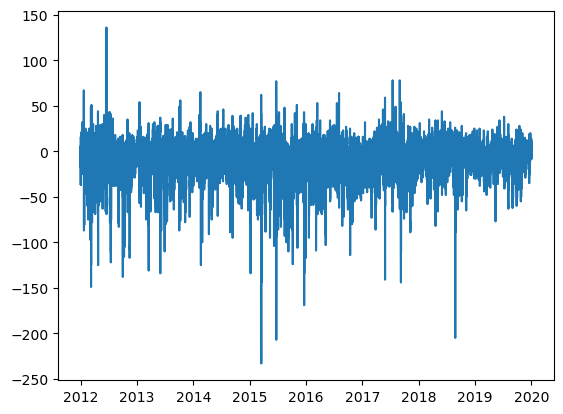

In [ ]:


z_scores = np.abs(stats.zscore(V_H_5['VX']))
threshold = 3  # 设置Z-score阈值
V_H_5['VX_IS1'] = np.where(z_scores >= threshold, 0, 1)
V_H_5['VX_no_outliers'] = V_H_5['VX'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN
# 在原位置插值
V_H_5['VX'] = V_H_5['VX_no_outliers'].interpolate(method='time')
# 删除临时列
V_H_5 = V_H_5.drop(columns=['VX_no_outliers'])

# z_scores = np.abs(stats.zscore(V_H_5['VY']))
# threshold = 3  # 设置Z-score阈值
# V_H_5['VY_IS1'] = np.where(z_scores >= threshold, 0, 1)
# V_H_5['VY_no_outliers'] = V_H_5['VY'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN
# # 在原位置插值
# V_H_5['VY'] = V_H_5['VY_no_outliers'].interpolate(method='time')
# # 删除临时列
# V_H_5 = V_H_5.drop(columns=['VY_no_outliers'])

# z_scores = np.abs(stats.zscore(V_H_5['VZ']))
# threshold = 3  # 设置Z-score阈值
# V_H_5['VZ_IS1'] = np.where(z_scores >= threshold, 0, 1)
# V_H_5['VZ_no_outliers'] = V_H_5['VZ'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN
# # 在原位置插值
# V_H_5['VZ'] = V_H_5['VZ_no_outliers'].interpolate(method='time')
# # 删除临时列
# V_H_5 = V_H_5.drop(columns=['VZ_no_outliers'])


plt.plot(V_H_5.index, V_H_5['SYMH'])

In [ ]:
#将V_H_5修改为1h的频率
V_H_5=V_H_5.resample('1H').mean()
print(V_H_5)

                             VX       SYMH    VX_IS1
datetime                                            
2012-01-01 00:00:00 -374.658333  -7.083333  1.000000
2012-01-01 01:00:00 -381.091667  -2.666667  1.000000
2012-01-01 02:00:00 -380.633333  -6.416667  1.000000
2012-01-01 03:00:00 -371.725000  -8.500000  1.000000
2012-01-01 04:00:00 -370.633333 -11.833333  1.000000
...                         ...        ...       ...
2020-01-01 19:00:00 -327.700000  -1.333333  1.000000
2020-01-01 20:00:00 -326.316667   4.000000  1.000000
2020-01-01 21:00:00 -321.150000   6.500000  0.666667
2020-01-01 22:00:00 -310.816667   5.583333  0.583333
2020-01-01 23:00:00 -307.491667   4.750000  0.833333

[70152 rows x 3 columns]


In [ ]:
combined_df['Time'] = pd.to_datetime(combined_df['Time'])
combined_df = combined_df.sort_values('Time')

In [ ]:
combined_df = combined_df.reset_index(drop=True)

In [ ]:

combined_df_2 = combined_df['Time'].copy()

for i in range(0, 301):
    # 创建新的时间列，向后偏移 i 小时
    combined_df[f'datetime_minus'] = combined_df_2 - pd.Timedelta(hours=i)
    
    # 重命名列
    
    rename_TQ = {col: f"{col}_{i}h" for col in TQ.columns if col != 'datetime'}
    rename_V_H_5 = {col: f"{col}_{i}h" for col in V_H_5.columns if col != 'datetime'}

    # 合并数据
    combined_df = pd.merge_asof(
        combined_df.sort_values(f'datetime_minus'),
        V_H_5.rename(columns=rename_V_H_5).sort_values('datetime'),
        left_on=f'datetime_minus', right_on='datetime',
        direction='nearest', tolerance=pd.Timedelta('1H')
    )
    combined_df = pd.merge_asof(
        combined_df.sort_values(f'datetime_minus'),
        TQ.rename(columns=rename_TQ).sort_values('datetime'),
        left_on=f'datetime_minus', right_on='datetime',
        direction='nearest', tolerance=pd.Timedelta('1H')
    )
    
    
    # 删除多余的 'datetime' 列
    combined_df.drop(columns=['datetime_minus'], inplace=True)
    combined_df.rename(columns={'datetime_x': 'datetime'}, inplace=True)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


In [ ]:
combined_df.to_hdf('combined_df_train.h5', key='df', mode='w')

In [2]:

combined_df=pd.read_hdf('combined_df_train.h5', key='df')
# #随机抽取10%的数据
#combined_df = combined_df.sample(frac=0.8, replace=False, random_state=1565)


In [3]:
combined_df=combined_df[combined_df['MLAT']>-90]

In [ ]:
print(combined_df)

                           Time        Flux  Flux_Error  PitchAngle  \
0       2012-10-05 00:02:15.891  490.435730    6.367156  155.454545   
1       2012-10-05 00:03:22.160    5.807396   31.224318  106.363636   
2       2012-10-05 00:03:43.449  187.287582   15.000000    8.181818   
3       2012-10-05 00:04:38.170  604.792603    5.983421   40.909091   
4       2012-10-05 00:05:00.649    3.760924   41.960934   90.000000   
...                         ...         ...         ...         ...   
1467336 2018-12-31 23:41:58.585    0.000000   72.370155  139.090909   
1467337 2018-12-31 23:45:42.045    0.000000  102.889496    8.181818   
1467338 2018-12-31 23:52:58.329    0.000000   82.561089  106.363636   
1467339 2018-12-31 23:53:49.009    0.000000  110.160118  139.090909   
1467340 2018-12-31 23:55:37.148    0.000000  116.690475  171.818182   

              B_Calc         B_Eq         I         L    L_star        MLT  \
0         462.260007   431.858483  0.167121  4.091372  3.862556   4.1

In [3]:
#按照时间排序
combined_df = combined_df.sort_values('Time')

In [ ]:
print(combined_df.shape)

(1467341, 2431)


In [4]:
combined_df=combined_df[100000:]

In [ ]:
print(combined_df['Kp_1h'])

0           0
1           0
2           0
3           0
4           0
           ..
1467336    10
1467337    10
1467338    10
1467339    10
1467340    10
Name: Kp_1h, Length: 1467341, dtype: int64


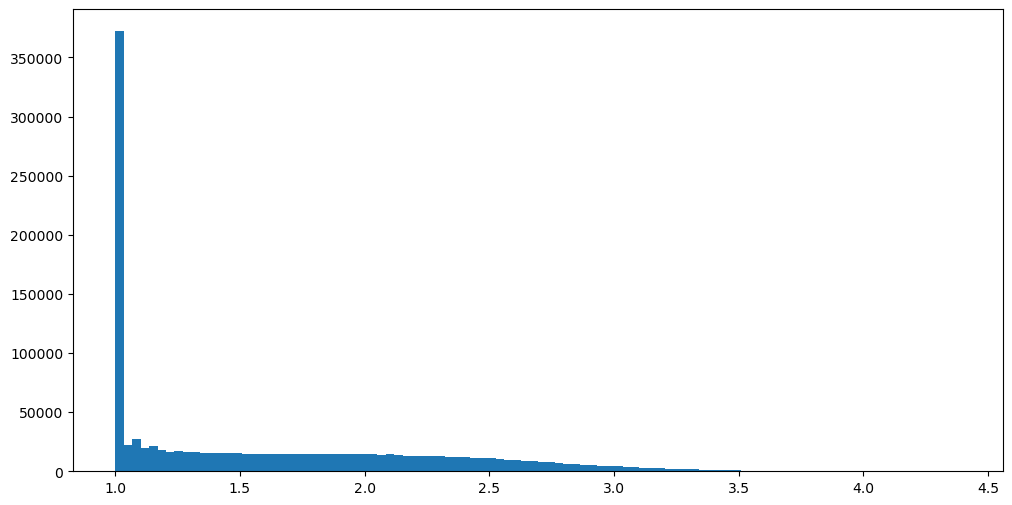

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(np.log10(combined_df['Flux']+10), bins=100)

plt.show()

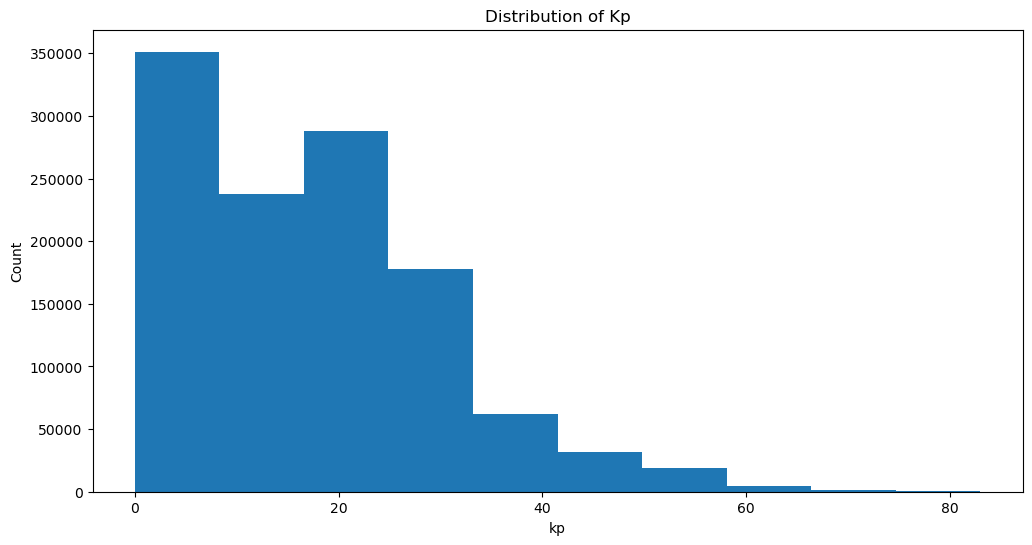

In [ ]:
#画出df_with_kp['kp']分布
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Kp_2h'])
plt.xlabel('kp')
plt.ylabel('Count')
plt.title('Distribution of Kp')
plt.show()

In [5]:
#检查是否有缺失值
print(combined_df.isnull().sum().tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(combined_df.shape)

(1173873, 2431)


In [ ]:



# combined_df = combined_df.dropna()
# print(combined_df.isnull().sum().tolist())


In [ ]:
print(combined_df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(combined_df)

                           Time        Flux  Flux_Error  PitchAngle  \
1446242 2018-12-03 09:44:03.008   26.573950   20.888264  155.454545   
1464013 2018-12-27 03:25:59.211    0.000000   84.678474    8.181818   
373187  2014-04-03 09:35:19.277    0.000000   78.128098   73.636364   
494142  2014-11-09 23:28:56.844    0.000000  283.637115  122.727273   
1395493 2018-09-23 04:55:49.842  361.854065    4.093741  122.727273   
...                         ...         ...         ...         ...   
78767   2013-02-01 23:14:25.069    3.954598   49.000000  171.818182   
111299  2013-03-20 10:19:44.510    0.000000  369.153108  106.363636   
912099  2016-08-17 15:51:42.631    0.000000   72.502586   90.000000   
515862  2014-12-09 18:48:30.377   22.792614   20.935389   90.000000   
809971  2016-02-28 14:15:32.450  143.290268    9.723484   73.636364   

               B_Calc         B_Eq         I         L    L_star        MLT  \
1446242    281.558017   280.978721  0.006141  4.740934  4.454257  19

In [ ]:
print(combined_df)

                           Time        Flux  Flux_Error  PitchAngle  \
1446242 2018-12-03 09:44:03.008   26.573950   20.888264  155.454545   
1464013 2018-12-27 03:25:59.211    0.000000   84.678474    8.181818   
373187  2014-04-03 09:35:19.277    0.000000   78.128098   73.636364   
494142  2014-11-09 23:28:56.844    0.000000  283.637115  122.727273   
1395493 2018-09-23 04:55:49.842  361.854065    4.093741  122.727273   
...                         ...         ...         ...         ...   
78767   2013-02-01 23:14:25.069    3.954598   49.000000  171.818182   
111299  2013-03-20 10:19:44.510    0.000000  369.153108  106.363636   
912099  2016-08-17 15:51:42.631    0.000000   72.502586   90.000000   
515862  2014-12-09 18:48:30.377   22.792614   20.935389   90.000000   
809971  2016-02-28 14:15:32.450  143.290268    9.723484   73.636364   

               B_Calc         B_Eq         I         L    L_star        MLT  \
1446242    281.558017   280.978721  0.006141  4.740934  4.454257  19

In [ ]:
columns_list = combined_df.columns.tolist()
print(columns_list)


['Time', 'Flux', 'Flux_Error', 'PitchAngle', 'B_Calc', 'B_Eq', 'I', 'L', 'L_star', 'MLT', 'MLAT', 'X', 'Y', 'Z', 'Interpolated_Lstar', 'VX_0h', 'SYMH_0h', 'VX_IS1_0h', 'BZGSM_0h', 'TEMP_0h', 'PDYN_0h', 'Kp_0h', 'Dst_0h', 'F107_0h', 'AE_0h', 'AL_0h', 'AU_0h', 'BZGSM_IS1_0h', 'TEMP_IS1_0h', 'PDYN_IS1_0h', 'F107_IS1_0h', 'VX_1h', 'SYMH_1h', 'VX_IS1_1h', 'BZGSM_1h', 'TEMP_1h', 'PDYN_1h', 'Kp_1h', 'Dst_1h', 'F107_1h', 'AE_1h', 'AL_1h', 'AU_1h', 'BZGSM_IS1_1h', 'TEMP_IS1_1h', 'PDYN_IS1_1h', 'F107_IS1_1h', 'VX_2h', 'SYMH_2h', 'VX_IS1_2h', 'BZGSM_2h', 'TEMP_2h', 'PDYN_2h', 'Kp_2h', 'Dst_2h', 'F107_2h', 'AE_2h', 'AL_2h', 'AU_2h', 'BZGSM_IS1_2h', 'TEMP_IS1_2h', 'PDYN_IS1_2h', 'F107_IS1_2h', 'VX_3h', 'SYMH_3h', 'VX_IS1_3h', 'BZGSM_3h', 'TEMP_3h', 'PDYN_3h', 'Kp_3h', 'Dst_3h', 'F107_3h', 'AE_3h', 'AL_3h', 'AU_3h', 'BZGSM_IS1_3h', 'TEMP_IS1_3h', 'PDYN_IS1_3h', 'F107_IS1_3h', 'VX_4h', 'SYMH_4h', 'VX_IS1_4h', 'BZGSM_4h', 'TEMP_4h', 'PDYN_4h', 'Kp_4h', 'Dst_4h', 'F107_4h', 'AE_4h', 'AL_4h', 'AU_4h', '

In [ ]:
time_steps=300
VX_time1 = [f'VX_{i}h' for i in range(0, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(0, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(0, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(0, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(0, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(0, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(0, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(0, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(0, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(0, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(0, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(0, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(0, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(0, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(0, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(0, time_steps + 1)]


In [ ]:
print(VX_time1)

['VX_0h', 'VX_1h', 'VX_2h', 'VX_3h', 'VX_4h', 'VX_5h', 'VX_6h', 'VX_7h', 'VX_8h', 'VX_9h', 'VX_10h', 'VX_11h', 'VX_12h', 'VX_13h', 'VX_14h', 'VX_15h', 'VX_16h', 'VX_17h', 'VX_18h', 'VX_19h', 'VX_20h', 'VX_21h', 'VX_22h', 'VX_23h', 'VX_24h', 'VX_25h', 'VX_26h', 'VX_27h', 'VX_28h', 'VX_29h', 'VX_30h', 'VX_31h', 'VX_32h', 'VX_33h', 'VX_34h', 'VX_35h', 'VX_36h', 'VX_37h', 'VX_38h', 'VX_39h', 'VX_40h', 'VX_41h', 'VX_42h', 'VX_43h', 'VX_44h', 'VX_45h', 'VX_46h', 'VX_47h', 'VX_48h', 'VX_49h', 'VX_50h', 'VX_51h', 'VX_52h', 'VX_53h', 'VX_54h', 'VX_55h', 'VX_56h', 'VX_57h', 'VX_58h', 'VX_59h', 'VX_60h', 'VX_61h', 'VX_62h', 'VX_63h', 'VX_64h', 'VX_65h', 'VX_66h', 'VX_67h', 'VX_68h', 'VX_69h', 'VX_70h', 'VX_71h', 'VX_72h', 'VX_73h', 'VX_74h', 'VX_75h', 'VX_76h', 'VX_77h', 'VX_78h', 'VX_79h', 'VX_80h', 'VX_81h', 'VX_82h', 'VX_83h', 'VX_84h', 'VX_85h', 'VX_86h', 'VX_87h', 'VX_88h', 'VX_89h', 'VX_90h', 'VX_91h', 'VX_92h', 'VX_93h', 'VX_94h', 'VX_95h', 'VX_96h', 'VX_97h', 'VX_98h', 'VX_99h', 'VX_100h'

In [ ]:
print(combined_df['Interpolated_Lstar'].min(), combined_df['Interpolated_Lstar'].max())
#找到combined_df['Interpolated_Lstar']=2.6对应归一化之后的值


1.1106969956787767 6.5601253442998635


In [6]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
# X_time7 = combined_df[Kp_time7].values
# X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time6,X_time9,X_time10,X_time11,X_time12,X_time13,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = [ 'MLT','Interpolated_Lstar', 'PitchAngle','MLAT']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y=np.log10(combined_df['Flux'].values +0.5) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(1366979, 151, 12)


In [7]:
del combined_df

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 301  # 根据您的数据调整
num_features = 12  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)

In [10]:

X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y)


# 归一化 Flux_Error
scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.2
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [11]:
print(X_non_time[:,1].min(), X_non_time[:,1].max())
original_value = 2.6

# 使用 scaler_non_time 转换原始值为标准化后的值
scaled_value = scaler_non_time.transform([[0, original_value, 0,0]])

L_YZ=scaled_value[0,1]
print(L_YZ)

-2.4264567353392694 1.8177877721949838
-1.2636204125486967


In [12]:
X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.2, random_state=42
)

In [13]:



time_series_input = Input(shape=(time_steps, num_features), name='time_series_input')
lstm_out = LSTM(64, activation='tanh')(time_series_input)
print(lstm_out.shape)

# 非时间序列输入：3个特征
non_time_series_input = Input(shape=(X_non_time_train.shape[1],), name='non_time_series_input')

# 拼接 LSTM 输出和非时间序列输入
concatenated = Concatenate()([lstm_out, non_time_series_input])

# 全连接层
dense1 = Dense(128, activation='relu')(concatenated)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)  # 根据任务调整输出层

# 构建模型
model = Model(inputs=[time_series_input, non_time_series_input], outputs=output)

# 编译模型
model.compile(optimizer='adam',
              loss='mean_squared_error',  # 根据任务调整损失函数
              metrics=['mae'])

# 模型概述
model.summary()






(None, 64)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_series_input (InputLayer)  [(None, 151, 12)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           19712       ['time_series_input[0][0]']      
                                                                                                  
 non_time_series_input (InputLa  [(None, 4)]         0           []                               
 yer)                                                                                             
                                                                                                  
 concatenate (Concatenate)      (None, 68)           0           ['lstm[0][0]',    

In [14]:
history = model.fit(
    [X_time_train, X_non_time_train],  # 输入
    y_train,
    epochs=100,  # 设置较大的 epoch，早停会提前终止
    batch_size=256,
    validation_data=([X_time_val, X_non_time_val], y_val),
    sample_weight=weight_train.flatten()
)

Epoch 1/100
4272/4272 [==============================] - 39s 9ms/step - loss: 0.0164 - mae: 0.0894 - val_loss: 0.0123 - val_mae: 0.0743
Epoch 2/100
4272/4272 [==============================] - 34s 8ms/step - loss: 0.0093 - mae: 0.0650 - val_loss: 0.0077 - val_mae: 0.0578
Epoch 3/100
4272/4272 [==============================] - 34s 8ms/step - loss: 0.0070 - mae: 0.0555 - val_loss: 0.0063 - val_mae: 0.0519
Epoch 4/100
4272/4272 [==============================] - 34s 8ms/step - loss: 0.0057 - mae: 0.0500 - val_loss: 0.0053 - val_mae: 0.0470
Epoch 5/100
4272/4272 [==============================] - 34s 8ms/step - loss: 0.0050 - mae: 0.0464 - val_loss: 0.0048 - val_mae: 0.0451
Epoch 6/100
4272/4272 [==============================] - 34s 8ms/step - loss: 0.0045 - mae: 0.0439 - val_loss: 0.0049 - val_mae: 0.0447
Epoch 7/100
4272/4272 [==============================] - 35s 8ms/step - loss: 0.0042 - mae: 0.0422 - val_loss: 0.0044 - val_mae: 0.0419
Epoch 8/100
4272/4272 [=========================

In [15]:
#保存scaler_time
import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')


['scaler_target.pkl']

In [ ]:
# y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# # 反缩放预测结果
# y_pred = scaler_target.inverse_transform(y_pred_scaled)
# y_val_original = scaler_target.inverse_transform(y_val)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
# r2 = r2_score(y_val_original, y_pred)
# print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')


# # 15. 可视化训练过程
# import matplotlib.pyplot as plt

# # 绘制训练和验证的损失
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='训练损失')
# plt.plot(history.history['val_loss'], label='验证损失')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training and Validation Loss')

# # 绘制训练和验证的 MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='训练 MAE')
# plt.plot(history.history['val_mae'], label='验证 MAE')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.title('Training and Validation MAE')

# plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [17]:
#保存模型

model.save('LSTM_H_1_model.h5')
#读取模型
#model = keras.models.load_model('LOW2_model.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


#去除X_non_time_val[:,2]中<L_YZ的值,并将其对应的X_time_val，y_val中的值也去除
mask = X_non_time_val[:,1] < L_YZ
X_non_time_val = X_non_time_val[~mask]
X_time_val = X_time_val[~mask]
y_val = y_val[~mask]

# 显示负号
plt.rcParams['axes.unicode_minus'] = False

y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val)



# 将对数值还原（如果需要）
y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')

# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections

if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density',fontsize=18)

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-8, -4)
# plt.ylim(-8, -4)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$',fontsize=18)
plt.ylabel('$log^{10}(PSD_{obs})$',fontsize=18)
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()

6206/6206 [==============================] - 18s 3ms/step
测试集上的 RMSE: 0.22566464407809073 测试集上的 R2: 0.9549048366703419


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
